# Notebook 2) Asylum Applications

In this Notebook I take a look at Asylum Applications statistics within Ireland and apply Machine Learning techniques to model application success rates. 

#### Section 2.1: Introduction

In [2]:
#Install relevant liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') 

#### Section 2.2 Asylum Application Demographics

This section will explore my dataset that I have aquired from the Eurostat website

Source:https://ec.europa.eu/eurostat/databrowser/view/migr_asydcfsta__custom_8222588/default/table?lang=en

In [4]:
#Read in the of Applications dataset
df  = pd.read_csv("Dataset 3) Eurostat - Application Demographics.csv")
print(df.head(5))
print(df.shape)
print(df['OBS_VALUE'].sum())

                     DATAFLOW        LAST UPDATE freq citizen sex unit    age  \
0  ESTAT:MIGR_ASYAPPCTZA(1.0)  27/10/23 23:00:00    A      AD   F  PER  TOTAL   
1  ESTAT:MIGR_ASYAPPCTZA(1.0)  27/10/23 23:00:00    A      AD   F  PER  TOTAL   
2  ESTAT:MIGR_ASYAPPCTZA(1.0)  27/10/23 23:00:00    A      AD   F  PER  TOTAL   
3  ESTAT:MIGR_ASYAPPCTZA(1.0)  27/10/23 23:00:00    A      AD   F  PER  TOTAL   
4  ESTAT:MIGR_ASYAPPCTZA(1.0)  27/10/23 23:00:00    A      AD   F  PER  TOTAL   

  asyl_app geo  TIME_PERIOD  OBS_VALUE  OBS_FLAG  
0  ASY_APP  IE         2008          0       NaN  
1  ASY_APP  IE         2009          0       NaN  
2  ASY_APP  IE         2010          0       NaN  
3  ASY_APP  IE         2011          0       NaN  
4  ASY_APP  IE         2012          0       NaN  
(207668, 12)
1263740


In [5]:
#Check we only have data relating to Ireland
df['geo'].unique()

array(['IE'], dtype=object)

In [6]:
#Exploring the Application column data
df['asyl_app'].unique()

array(['ASY_APP', 'NASY_APP', 'SSEQ'], dtype=object)

In [7]:
#Remove the unecessary 'asyl_app' data
values_to_remove = ['NASY_APP', 'SSEQ']
df = df[~ df['asyl_app'].isin(values_to_remove)]
df['asyl_app'].unique()

array(['ASY_APP'], dtype=object)

In [8]:
#Trimming the data
selected_columns = ['citizen', 'sex', 'age', 'TIME_PERIOD', 'OBS_VALUE']
df = df[selected_columns]
print(df.head(5))

  citizen sex    age  TIME_PERIOD  OBS_VALUE
0      AD   F  TOTAL         2008          0
1      AD   F  TOTAL         2009          0
2      AD   F  TOTAL         2010          0
3      AD   F  TOTAL         2011          0
4      AD   F  TOTAL         2012          0


In [9]:
#Lets explore the citizen data
df['citizen'].unique()

array(['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ',
       'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO',
       'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CF', 'CG', 'CH',
       'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CY', 'CZ',
       'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'EL',
       'ER', 'ES', 'ET', 'EU27_2020', 'EXT_EU27_2020', 'FI', 'FJ', 'FM',
       'FR', 'GA', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GT', 'GW', 'GY',
       'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IR', 'IS',
       'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KP',
       'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT',
       'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MH', 'MK', 'ML',
       'MM', 'MN', 'MR', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', nan,
       'NE', 'NG', 'NI', 'NL', 'NO', 'NP', 'NR', 'NZ', 'OM', 'PA', 'PE',
       'PG', 'PH', 'PK', 'PL', 'PS', 'PT', 'PW', 'PY

In [10]:
#Remove the unecessary data
values_to_remove = ['EU27_2020', 'EXT_EU27_2020', 'TOTAL', 'UK_OCT', 'STLS' ]
df = df[~ df['citizen'].isin(values_to_remove)]
df['citizen'].unique()

array(['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ',
       'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO',
       'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CF', 'CG', 'CH',
       'CI', 'CK', 'CL', 'CM', 'CN', 'CO', 'CR', 'CU', 'CV', 'CY', 'CZ',
       'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'EH', 'EL',
       'ER', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GD', 'GE', 'GH',
       'GM', 'GN', 'GQ', 'GT', 'GW', 'GY', 'HN', 'HR', 'HT', 'HU', 'ID',
       'IE', 'IL', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE',
       'KG', 'KH', 'KI', 'KM', 'KN', 'KP', 'KR', 'KW', 'KZ', 'LA', 'LB',
       'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC',
       'MD', 'ME', 'MG', 'MH', 'MK', 'ML', 'MM', 'MN', 'MR', 'MT', 'MU',
       'MV', 'MW', 'MX', 'MY', 'MZ', nan, 'NE', 'NG', 'NI', 'NL', 'NO',
       'NP', 'NR', 'NZ', 'OM', 'PA', 'PE', 'PG', 'PH', 'PK', 'PL', 'PS',
       'PT', 'PW', 'PY', 'QA', 'RNC', 'RO', 'RS', 'R

In [11]:
#Exploring the gender data
df['sex'].unique()

array(['F', 'M', 'T', 'UNK'], dtype=object)

In [12]:
#Removing the total rows
df = df[~df['sex'].isin(['T'])]
df['sex'].unique()

array(['F', 'M', 'UNK'], dtype=object)

In [13]:
#Exploring the age data
df['age'].unique()

array(['TOTAL', 'UNK', 'Y14-17', 'Y18-34', 'Y35-64', 'Y_GE65', 'Y_LT14',
       'Y_LT18'], dtype=object)

In [14]:
#Removing unecessary columns to ensure the dataset doesn't overlap
df = df[~df['age'].isin(['TOTAL', 'Y_LT18'])]
df['age'].unique()

array(['UNK', 'Y14-17', 'Y18-34', 'Y35-64', 'Y_GE65', 'Y_LT14'],
      dtype=object)

In [15]:
#Finally, we want to remove all OBS_VALUES which are 0 
df = df[df['OBS_VALUE'] != 0]

In [16]:
#Looking at our trimmed dataset
print(df.head(5))
print(df.shape)
print(df['OBS_VALUE'].sum())

     citizen sex     age  TIME_PERIOD  OBS_VALUE
2098      AF   F  Y14-17         2022          5
2116      AF   F  Y18-34         2008          5
2121      AF   F  Y18-34         2013          5
2122      AF   F  Y18-34         2014          5
2123      AF   F  Y18-34         2015          5
(2363, 5)
45580


In [17]:
#Next I want to assign countries and continent to the country codes
ref_df = pd.read_csv('Dataset 4) Additional Country Info.csv')

#print(ref_df.head(10))

In [18]:
#Merge datasets on 'citizen' column (country code)
df1 = pd.merge(df, ref_df, left_on='citizen', right_on='Country Code', how='left')
df1 = df1.drop('Country Code', axis=1)

#Display the dataset
print(df1.head(5))
print(df1['OBS_VALUE'].sum())

  citizen sex     age  TIME_PERIOD  OBS_VALUE      Country    Continent  \
0      AF   F  Y14-17         2022          5  Afghanistan  Middle-East   
1      AF   F  Y18-34         2008          5  Afghanistan  Middle-East   
2      AF   F  Y18-34         2013          5  Afghanistan  Middle-East   
3      AF   F  Y18-34         2014          5  Afghanistan  Middle-East   
4      AF   F  Y18-34         2015          5  Afghanistan  Middle-East   

   GDP per Capita    GPI  
0             373  3.448  
1             373  3.448  
2             373  3.448  
3             373  3.448  
4             373  3.448  
45580


In [19]:
#Duplicates check 
duplicates = df1[df1.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [citizen, sex, age, TIME_PERIOD, OBS_VALUE, Country, Continent, GDP per Capita, GPI]
Index: []


In [20]:
#Assessing data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 0 to 2362
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   citizen         2363 non-null   object 
 1   sex             2363 non-null   object 
 2   age             2363 non-null   object 
 3   TIME_PERIOD     2363 non-null   int64  
 4   OBS_VALUE       2363 non-null   int64  
 5   Country         2363 non-null   object 
 6   Continent       2363 non-null   object 
 7   GDP per Capita  2363 non-null   int64  
 8   GPI             2363 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 184.6+ KB


In [21]:
#Assessing data
df1.describe()

,TIME_PERIOD,OBS_VALUE,GDP per Capita,GPI
count,2363.000000,2363.000000,2363.000000,2363.000000
mean,2015.680068,19.289039,4074.802370,2.446156
std,4.720114,54.840835,5758.989786,0.498941
min,2008.000000,5.000000,25.000000,1.450000
25%,2011.000000,5.000000,944.000000,2.020000
50%,2016.000000,5.000000,2450.000000,2.405000
75%,2020.000000,15.000000,5135.500000,2.800000
max,2022.000000,1055.000000,69185.000000,3.448000


#### Section 2.3: Data Visualisation

In [22]:
#Summing the OBS_VALUES by Continent
grouped_by_cont = df1.groupby('Continent')['OBS_VALUE'].sum()
print(grouped_by_cont)
print(grouped_by_cont.sum())

Continent
Africa           21610
Asia              7305
Europe            9250
Middle-East       6050
North America      430
South America      935
Name: OBS_VALUE, dtype: int64
45580


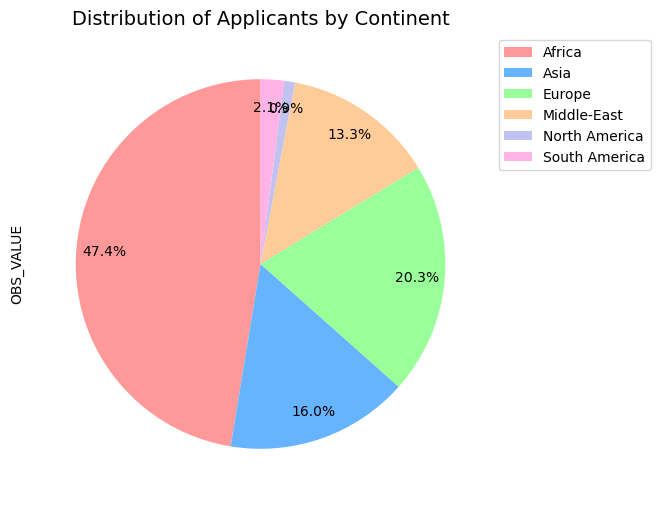

In [23]:
#Colours chosen are purely aesthetics
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

#Display a pie chart with pastel colors
plt.figure(figsize=(6, 6)) 
grouped_by_cont.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, labels=None)  

#Title and Legend 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=grouped_by_cont.index)
plt.title('Distribution of Applicants by Continent', fontsize=14)
plt.show()

In [24]:
#Grouping the data by sex
grouped_by_sex = df1.groupby('sex')['OBS_VALUE'].sum()
print(grouped_by_sex)
print(grouped_by_sex.sum())

sex
F      15100
M      30475
UNK        5
Name: OBS_VALUE, dtype: int64
45580


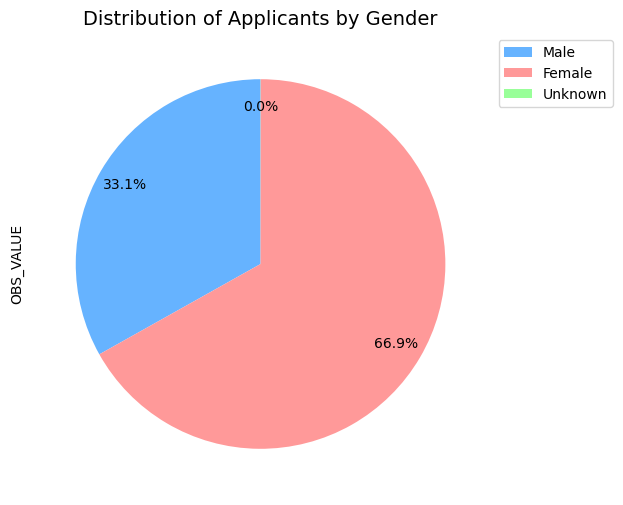

In [25]:
#Colours chosen are chosen based on gender association
colors = ['#66b3ff','#ff9999','#99ff99']

#Display a pie chart with pastel colors
plt.figure(figsize=(6, 6)) 
grouped_by_sex.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, labels=None)  

#Title and Legend 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels=['Male', 'Female', 'Unknown'])
plt.title('Distribution of Applicants by Gender', fontsize=14)
plt.show()

Allignment with Tufte's Principles: 

Clarity: The use of colours for different genders enhances clarity. It's easy for the viewer to differentiate between categories.

Data Density: The percentages add a layer of information and to not overwhelming the viewer. This gives an added layer of value to the pie chart which wouldn't be considered a particularly precise grapghical display. 

In [26]:
#Grouping the data by Age
grouped_by_age = df1.groupby('age')['OBS_VALUE'].sum()

#Reorder the groups
grouped_by_age = grouped_by_age.reindex(['Y_LT14', 'Y14-17', 'Y18-34', 'Y35-64', 'Y_GE65'])

print(grouped_by_age)
print(grouped_by_age.sum())

age
Y_LT14     8200
Y14-17     1670
Y18-34    24640
Y35-64    10980
Y_GE65       90
Name: OBS_VALUE, dtype: int64
45580


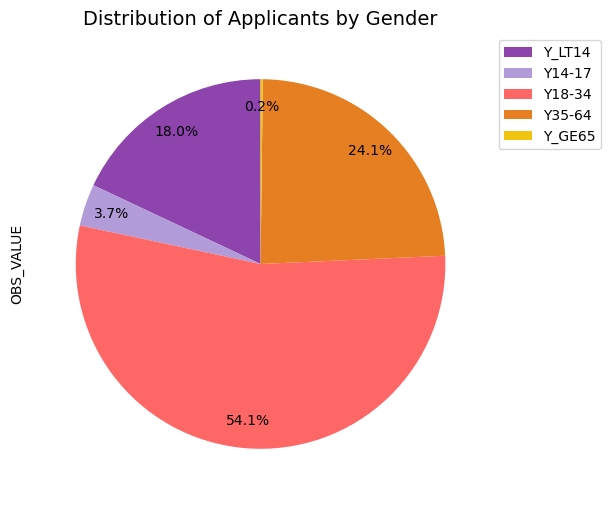

In [27]:
#Colours chosen are chosen based on an aesthetic gradient
colors = ['#8e44ad', '#b19cd9', '#ff6666', '#e67e22', '#f1c40f' ] 

#Display a pie chart
plt.figure(figsize=(6, 6)) 
grouped_by_age.plot(kind='pie', autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors, labels=None)  

#Title and Legend 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), labels = grouped_by_age.index)
plt.title('Distribution of Applicants by Gender', fontsize=14)
plt.show()

#### Section 2.4: Asylum Applicants Success Rates

This section will look at number of asylum applications in Ireland by Year, by Country of Origin and also investigate the factors influencing acceptance

In [28]:
#Reading in the of Applications dataset
df  = pd.read_csv("Dataset 5) Eurostat - Application Outcomes.csv")

print(df.head(5))
print(df.shape)

                    DATAFLOW        LAST UPDATE freq unit citizen sex    age  \
0  ESTAT:MIGR_ASYDCFSTA(1.0)  17/10/23 23:00:00    A  PER      AD   F  TOTAL   
1  ESTAT:MIGR_ASYDCFSTA(1.0)  17/10/23 23:00:00    A  PER      AD   F  TOTAL   
2  ESTAT:MIGR_ASYDCFSTA(1.0)  17/10/23 23:00:00    A  PER      AD   F  TOTAL   
3  ESTAT:MIGR_ASYDCFSTA(1.0)  17/10/23 23:00:00    A  PER      AD   F  TOTAL   
4  ESTAT:MIGR_ASYDCFSTA(1.0)  17/10/23 23:00:00    A  PER      AD   F  TOTAL   

  decision geo  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0  GENCONV  IE         2008          0      NaN  
1  GENCONV  IE         2009          0      NaN  
2  GENCONV  IE         2010          0      NaN  
3  GENCONV  IE         2011          0      NaN  
4  GENCONV  IE         2012          0      NaN  
(593184, 12)


In [29]:
#Check we only have data relating to Ireland
df['geo'].unique()

array(['IE'], dtype=object)

In [30]:
#Trimming the data
selected_columns = ['citizen', 'sex', 'age', 'decision', 'TIME_PERIOD', 'OBS_VALUE']
df = df[selected_columns]

print(df.head(5))
print(df.shape)
print(df['OBS_VALUE'].sum())

  citizen sex    age decision  TIME_PERIOD  OBS_VALUE
0      AD   F  TOTAL  GENCONV         2008          0
1      AD   F  TOTAL  GENCONV         2009          0
2      AD   F  TOTAL  GENCONV         2010          0
3      AD   F  TOTAL  GENCONV         2011          0
4      AD   F  TOTAL  GENCONV         2012          0
(593184, 6)
857275


In [31]:
#Check we only have data relating to Ireland
df['decision'].unique()

array(['GENCONV', 'HUMSTAT', 'REJECTED', 'SUB_PROT', 'TOTAL', 'TOTAL_POS'],
      dtype=object)

We are only interested in success rates so the only relevant columns are 'REJECTED' and 'TOTAL_POS'.

In [32]:
values_to_keep = ['REJECTED', 'TOTAL_POS']
df = df[df['decision'].isin(values_to_keep)]
df['decision'].unique()
print(df['OBS_VALUE'].sum())

357020


Now lets look at the Citizen column

In [33]:
print(df['citizen'].unique())

['AD' 'AE' 'AF' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' 'AZ' 'BA' 'BB' 'BD'
 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BN' 'BO' 'BR' 'BS' 'BT' 'BW' 'BY' 'BZ'
 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CK' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CV'
 'CY' 'CZ' 'DE' 'DJ' 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'EH' 'EL' 'ER'
 'ES' 'ET' 'EU27_2020' 'EXT_EU27_2020' 'FI' 'FJ' 'FM' 'FR' 'GA' 'GD' 'GE'
 'GH' 'GM' 'GN' 'GQ' 'GT' 'GW' 'GY' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL'
 'IN' 'IQ' 'IR' 'IS' 'IT' 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KI' 'KM' 'KN'
 'KP' 'KR' 'KW' 'KZ' 'LA' 'LB' 'LC' 'LI' 'LK' 'LR' 'LS' 'LT' 'LU' 'LV'
 'LY' 'MA' 'MC' 'MD' 'ME' 'MG' 'MH' 'MK' 'ML' 'MM' 'MN' 'MR' 'MT' 'MU'
 'MV' 'MW' 'MX' 'MY' 'MZ' nan 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NR' 'NZ' 'OM'
 'PA' 'PE' 'PG' 'PH' 'PK' 'PL' 'PS' 'PT' 'PW' 'PY' 'QA' 'RNC' 'RO' 'RS'
 'RU' 'RW' 'SA' 'SB' 'SC' 'SD' 'SE' 'SG' 'SI' 'SK' 'SL' 'SM' 'SN' 'SO'
 'SR' 'SS' 'ST' 'STLS' 'SV' 'SY' 'SZ' 'TD' 'TG' 'TH' 'TJ' 'TL' 'TM' 'TN'
 'TO' 'TOTAL' 'TR' 'TT' 'TV' 'TW' 'TZ' 'UA' 'UG' 'UK' 'UK_OCT' 'UNK

In [34]:
#Removing columns which aren't relating to countries
values_to_remove = ['EU27_2020', 'EXT_EU27_2020', 'TOTAL', 'UK_OCT', 'STLS' ]
df = df[ ~ df['citizen'].isin(values_to_remove)]
print(df['citizen'].unique())
print(df['OBS_VALUE'].sum())

['AD' 'AE' 'AF' 'AG' 'AL' 'AM' 'AO' 'AR' 'AT' 'AU' 'AZ' 'BA' 'BB' 'BD'
 'BE' 'BF' 'BG' 'BH' 'BI' 'BJ' 'BN' 'BO' 'BR' 'BS' 'BT' 'BW' 'BY' 'BZ'
 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CK' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CV'
 'CY' 'CZ' 'DE' 'DJ' 'DK' 'DM' 'DO' 'DZ' 'EC' 'EE' 'EG' 'EH' 'EL' 'ER'
 'ES' 'ET' 'FI' 'FJ' 'FM' 'FR' 'GA' 'GD' 'GE' 'GH' 'GM' 'GN' 'GQ' 'GT'
 'GW' 'GY' 'HN' 'HR' 'HT' 'HU' 'ID' 'IE' 'IL' 'IN' 'IQ' 'IR' 'IS' 'IT'
 'JM' 'JO' 'JP' 'KE' 'KG' 'KH' 'KI' 'KM' 'KN' 'KP' 'KR' 'KW' 'KZ' 'LA'
 'LB' 'LC' 'LI' 'LK' 'LR' 'LS' 'LT' 'LU' 'LV' 'LY' 'MA' 'MC' 'MD' 'ME'
 'MG' 'MH' 'MK' 'ML' 'MM' 'MN' 'MR' 'MT' 'MU' 'MV' 'MW' 'MX' 'MY' 'MZ' nan
 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NR' 'NZ' 'OM' 'PA' 'PE' 'PG' 'PH' 'PK'
 'PL' 'PS' 'PT' 'PW' 'PY' 'QA' 'RNC' 'RO' 'RS' 'RU' 'RW' 'SA' 'SB' 'SC'
 'SD' 'SE' 'SG' 'SI' 'SK' 'SL' 'SM' 'SN' 'SO' 'SR' 'SS' 'ST' 'SV' 'SY'
 'SZ' 'TD' 'TG' 'TH' 'TJ' 'TL' 'TM' 'TN' 'TO' 'TR' 'TT' 'TV' 'TW' 'TZ'
 'UA' 'UG' 'UK' 'UNK' 'US' 'UY' 'UZ' 'VA' 'VC' 'VE' 'VN' 'VU' 'WS' 'XK'


Now lets look at the Sex column

In [35]:
df['sex'].unique()

array(['F', 'M', 'T', 'UNK'], dtype=object)

In [36]:
df = df[~df['sex'].isin(['T'])]
df['sex'].unique()

array(['F', 'M', 'UNK'], dtype=object)

And finally the Age columns

In [37]:
df['age'].unique()

array(['TOTAL', 'UNK', 'Y14-17', 'Y18-34', 'Y35-64', 'Y_GE65', 'Y_LT14',
       'Y_LT18'], dtype=object)

In [38]:
df = df[~df['age'].isin(['TOTAL', 'Y_LT18'])]
df['age'].unique()

array(['UNK', 'Y14-17', 'Y18-34', 'Y35-64', 'Y_GE65', 'Y_LT14'],
      dtype=object)

In [40]:
#Final Information
print(df.shape)
print(df['OBS_VALUE'].sum())
print(df['OBS_VALUE'].mean())

(108522, 6)
23715
0.21852711892519489


In [41]:
#Splitting the dataframe by decision
df_dec1 = df[df['decision'] == 'REJECTED']
df_dec2 = df[df['decision'] == 'TOTAL_POS']

print(df_dec2.head(5))
print(df_dec2.shape)
print(df_dec2['OBS_VALUE'].sum())

print(df_dec1.head(5))
print(df_dec1.shape)
print(df_dec1['OBS_VALUE'].sum())

# Reconciliation Check
print(df_dec2['OBS_VALUE'].sum() + df_dec1['OBS_VALUE'].sum())

    citizen sex  age   decision  TIME_PERIOD  OBS_VALUE
165      AD   F  UNK  TOTAL_POS         2008          0
166      AD   F  UNK  TOTAL_POS         2009          0
167      AD   F  UNK  TOTAL_POS         2010          0
168      AD   F  UNK  TOTAL_POS         2011          0
169      AD   F  UNK  TOTAL_POS         2012          0
(54270, 6)
9245
    citizen sex  age  decision  TIME_PERIOD  OBS_VALUE
120      AD   F  UNK  REJECTED         2008          0
121      AD   F  UNK  REJECTED         2009          0
122      AD   F  UNK  REJECTED         2010          0
123      AD   F  UNK  REJECTED         2011          0
124      AD   F  UNK  REJECTED         2012          0
(54252, 6)
14470
23715


In [42]:
# Join the two datasets on specified columns
Tot_df = pd.merge(df_dec1, df_dec2, on=['citizen', 'sex', 'age', 'TIME_PERIOD'], 
                     suffixes=('_Rejected', '_Positive'))

Tot_df = Tot_df.drop(['decision_Rejected', 'decision_Positive'], axis=1)

print(Tot_df.head(5))
print(Tot_df.shape)
print(Tot_df['OBS_VALUE_Rejected'].sum())
print(Tot_df['OBS_VALUE_Positive'].sum())
print(Tot_df['OBS_VALUE_Rejected'].sum() + Tot_df['OBS_VALUE_Positive'].sum())

  citizen sex  age  TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive
0      AD   F  UNK         2008                   0                   0
1      AD   F  UNK         2009                   0                   0
2      AD   F  UNK         2010                   0                   0
3      AD   F  UNK         2011                   0                   0
4      AD   F  UNK         2012                   0                   0
(54252, 6)
14470
9245
23715


#### Section 2.5: Visualising Trends by Year

In [43]:
#Grouping by year
grouped_by_year = Tot_df.groupby('TIME_PERIOD').agg({'OBS_VALUE_Rejected': 'sum', 'OBS_VALUE_Positive': 'sum'}).reset_index()

print(grouped_by_year.head(5))
print(grouped_by_year['OBS_VALUE_Rejected'].sum())
print(grouped_by_year['OBS_VALUE_Positive'].sum())

   TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive
0         2008                3110                 235
1         2009                2820                  65
2         2010                1380                   5
3         2011                1175                  35
4         2012                 675                  55
14470
9245


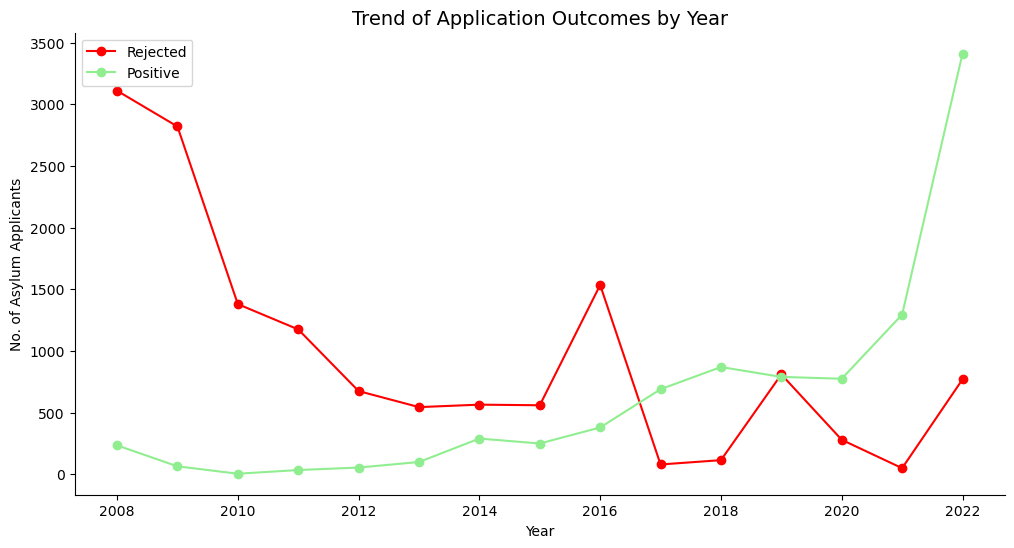

In [44]:
#Plotting
grouped_by_year.plot(x='TIME_PERIOD', 
                     y=['OBS_VALUE_Rejected', 'OBS_VALUE_Positive'], 
                     marker='o', 
                     linestyle='-', 
                     figsize=(12, 6), 
                     color=['#FF0000', '#90EE90'] )

# Titles and Legend
plt.title('Trend of Application Outcomes by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('No. of Asylum Applicants')
plt.legend(['Rejected', 'Positive'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

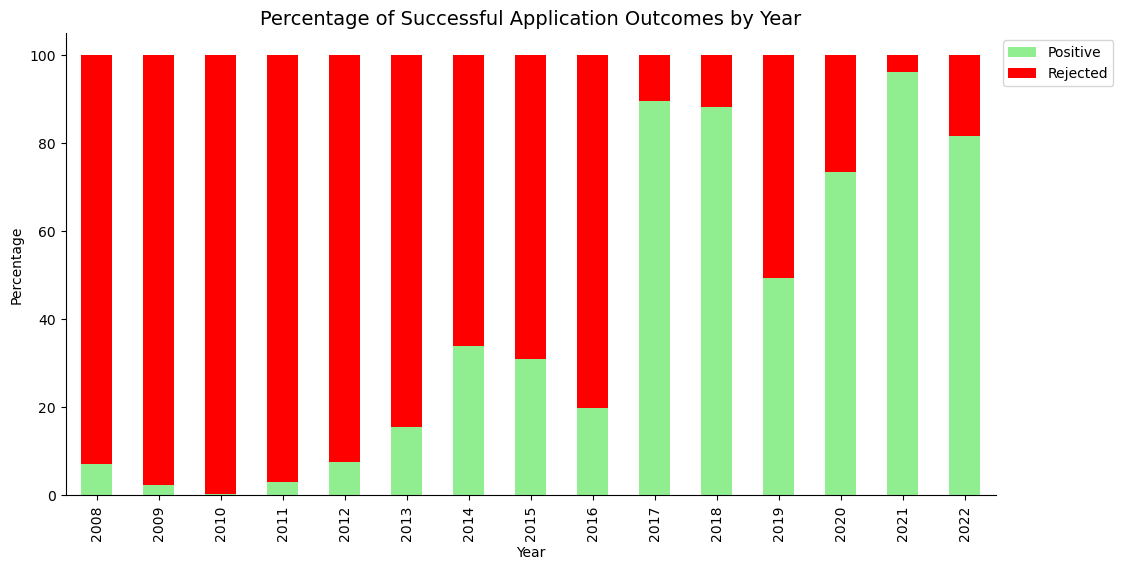

In [48]:
# Calculating Percentages
grouped_by_year['Percentage_Positive'] = (grouped_by_year['OBS_VALUE_Positive'] / (grouped_by_year['OBS_VALUE_Rejected'] + grouped_by_year['OBS_VALUE_Positive'])) * 100
grouped_by_year['Percentage_Rejected'] = 100 - grouped_by_year['Percentage_Positive']

# Plotting the percentages
fig, ax = plt.subplots(figsize=(12, 6))
grouped_by_year.plot(x='TIME_PERIOD', 
                     y=['Percentage_Positive', 'Percentage_Rejected'], 
                     kind='bar', 
                     stacked=True, 
                     ax=ax, 
                     color=['#90EE90', '#FF0000'] )

# Titles and Legend
plt.title('Percentage of Successful Application Outcomes by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(['Positive', 'Rejected'], loc='upper left', bbox_to_anchor=(1, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

Allignment with Tuftes Principles: 

Labels and Titles: Clear titles for the chart and axes aids in the interpretation of the data. The legend is appropriately placed, and the chart is free from any unnecessary labels.

#### Section 2.6: Investigating if Citizenship influences Success Rates

In [49]:
#print(Tot_df.head(5))
#print(Tot_df.shape)
#print(Tot_df['OBS_VALUE_Rejected'].sum())
#print(Tot_df['OBS_VALUE_Positive'].sum())

In [50]:
# Filter out countries with zero values
Filtered_df = Tot_df[(Tot_df[['OBS_VALUE_Rejected', 'OBS_VALUE_Positive']] != 0).any(axis=1)]

# Display the filtered DataFrame
print(Filtered_df)
print(Filtered_df.shape)
print(Filtered_df['OBS_VALUE_Rejected'].sum())
print(Filtered_df['OBS_VALUE_Positive'].sum())

      citizen sex     age  TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive
570        AF   F  Y18-34         2008                   5                   0
571        AF   F  Y18-34         2009                   5                   0
578        AF   F  Y18-34         2016                   5                   0
580        AF   F  Y18-34         2018                   0                   5
582        AF   F  Y18-34         2020                   0                   5
...       ...  ..     ...          ...                 ...                 ...
54157      ZW   M  Y_LT14         2018                   0                   5
54158      ZW   M  Y_LT14         2019                   5                  10
54159      ZW   M  Y_LT14         2020                   0                  15
54160      ZW   M  Y_LT14         2021                   0                  20
54161      ZW   M  Y_LT14         2022                  10                  50

[1739 rows x 6 columns]
(1739, 6)
14470
9245


Let's investigate whether certain countries have higher acceptance rates

In [51]:
#Group by 'citizen' and aggregate the sum of 'OBS_VALUE_Rejected' and 'OBS_VALUE_Positive'
grouped_by_citizen = Filtered_df.groupby('citizen').agg({'OBS_VALUE_Rejected': 'sum', 'OBS_VALUE_Positive': 'sum'}).reset_index()

#Display the Data
print(grouped_by_citizen)
print(grouped_by_citizen.shape)
print(grouped_by_citizen['citizen'].unique())
print(grouped_by_citizen['OBS_VALUE_Rejected'].sum())
print(grouped_by_citizen['OBS_VALUE_Positive'].sum())

   citizen  OBS_VALUE_Rejected  OBS_VALUE_Positive
0       AF                 445                 770
1       AL                 940                 295
2       AM                  15                   0
3       AO                  65                  15
4       BD                 435                 140
..     ...                 ...                 ...
67      VN                   5                  15
68      XK                  70                  25
69      YE                   5                  10
70      ZA                 440                 370
71      ZW                 730                 820

[72 rows x 3 columns]
(72, 3)
['AF' 'AL' 'AM' 'AO' 'BD' 'BI' 'BJ' 'BO' 'BR' 'BT' 'BW' 'BY' 'CD' 'CG'
 'CI' 'CM' 'CN' 'DZ' 'EG' 'ER' 'ET' 'GE' 'GH' 'GN' 'HR' 'IL' 'IN' 'IQ'
 'IR' 'KE' 'KG' 'KW' 'LK' 'LR' 'LY' 'MA' 'MD' 'ML' 'MM' 'MN' 'MU' 'MW'
 'MX' 'MY' 'NE' 'NG' 'NI' 'NP' 'PK' 'PS' 'RS' 'RU' 'RW' 'SA' 'SD' 'SL'
 'SO' 'SS' 'SV' 'SY' 'SZ' 'TD' 'TG' 'TR' 'UA' 'UG' 'VE' 'VN' 'XK' 'YE'
 '

In [52]:
#Calculate the positive percentage and add a new column to the grouped DataFrame
grouped_by_citizen['Positive_Percentage'] = (grouped_by_citizen['OBS_VALUE_Positive'] / 
(grouped_by_citizen['OBS_VALUE_Rejected'] + grouped_by_citizen['OBS_VALUE_Positive'])) * 100

#Ranking the Data by Positive_Percentage
grouped_by_citizen = grouped_by_citizen.sort_values(by='Positive_Percentage', ascending=True)

#Display Data
print(grouped_by_citizen.head(5))

   citizen  OBS_VALUE_Rejected  OBS_VALUE_Positive  Positive_Percentage
24      HR                  15                   0                  0.0
44      NE                  10                   0                  0.0
52      RW                  35                   0                  0.0
38      MM                  10                   0                  0.0
36      MD                 275                   0                  0.0


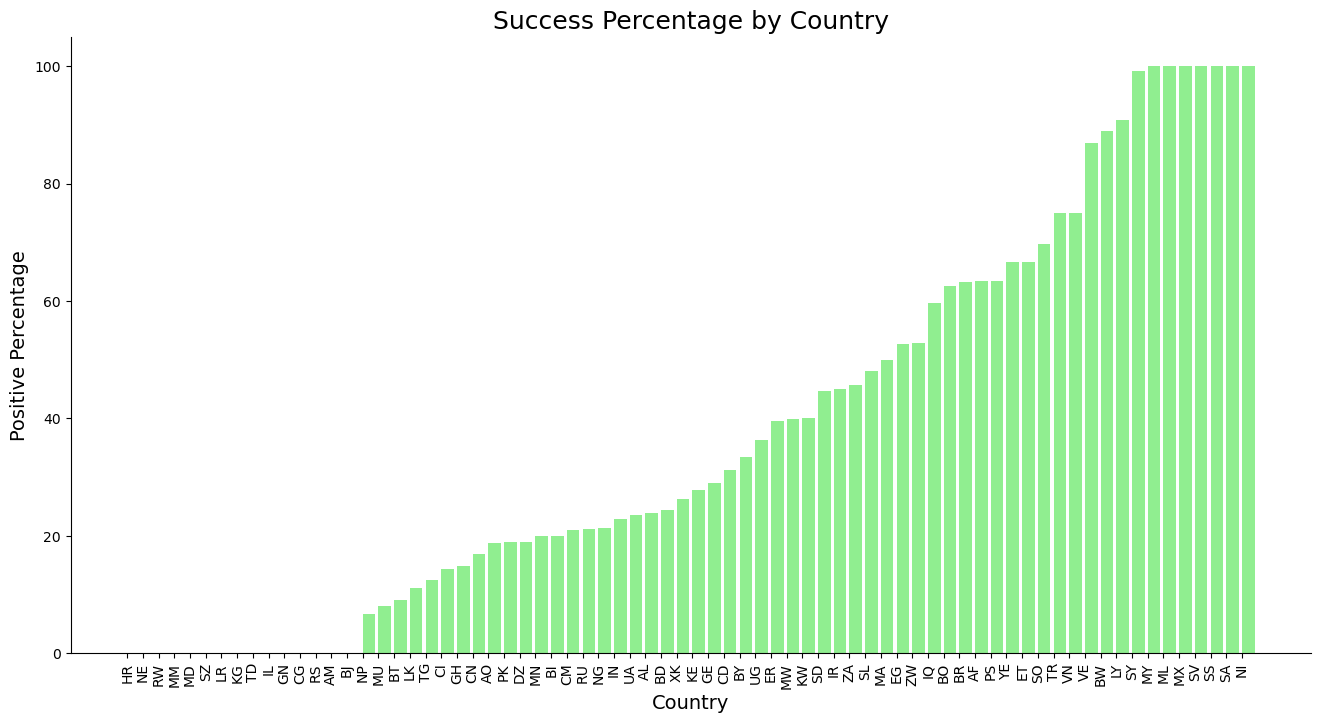

In [55]:
#Plotting a bar chart
plt.figure(figsize=(16, 8))

plt.bar(grouped_by_citizen['citizen'], 
        grouped_by_citizen['Positive_Percentage'] , 
        color='#90EE90' , 
        width= 0.8 , 
        align= 'edge')

plt.xlabel('Country', fontsize = 14)
plt.ylabel('Positive Percentage', fontsize = 14)
plt.title('Success Percentage by Country', fontsize = 18)
plt.xticks(rotation=90) 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

After looking at the above graph I thought that this might be normally distributed, so I perfromed some high-level checks so if this was the case.

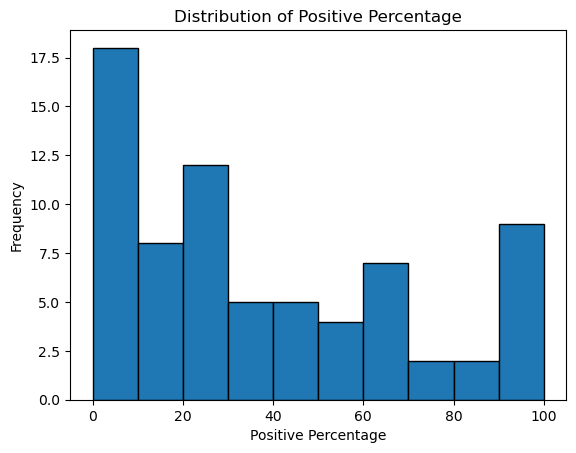

In [56]:
#Create a frequency histogram
plt.hist(grouped_by_citizen['Positive_Percentage'] , bins=10, edgecolor='black')

#Add labels and title
plt.xlabel('Positive Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Percentage')
plt.show()

In [57]:
#Perform Shapiro-Wilk test
statistic, p_value = stats.shapiro(grouped_by_citizen['Positive_Percentage'])

#Print the results
print(f"Shapiro-Wilk Statistic: {statistic}, p-value: {p_value}")

#Is P-value is less than the significance level
if p_value > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

Shapiro-Wilk Statistic: 0.8904215097427368, p-value: 1.2918198990519159e-05
The data does not follow a normal distribution.


As we can see from our graph and test above, we can conclude that the data is not normally distributed.

#### Section 2.7: Success Rates by Continent

In any case, we can see the Citizenship seems to have some sort of influence on the success rate but I ultimately felt this is a bit too granular for me to use further, so I made the decision to update this to citizenship to continental citizenship. 

In [54]:
#Merge datasets on 'citizen' column
df1 = pd.merge(grouped_by_citizen, ref_df, left_on='citizen', right_on='Country Code', how='left')

#Display the dataset
print(df1.head(5))
print(df1.shape)

  citizen  OBS_VALUE_Rejected  OBS_VALUE_Positive  Positive_Percentage  \
0      HR                  15                   0                  0.0   
1      NE                  10                   0                  0.0   
2      RW                  35                   0                  0.0   
3      MM                  10                   0                  0.0   
4      MD                 275                   0                  0.0   

  Country Code  Country Continent  GDP per Capita    GPI  
0           HR  Croatia    Europe           16983  1.450  
1           NE    Niger    Africa             591  2.625  
2           RW   Rwanda    Africa             822  2.051  
3           MM  Myanmar      Asia            1089  2.741  
4           MD  Moldova    Europe            4468  1.873  
(72, 9)


In [55]:
#Group by continent and aggregate the sum of OBS_VALUE_Rejected and OBS_VALUE_Positive
grouped_by_cont = df1.groupby('Continent').agg({'OBS_VALUE_Rejected': 'sum', 'OBS_VALUE_Positive': 'sum'}).reset_index()

#Total Observations
grouped_by_cont['Total Observations'] = (grouped_by_cont['OBS_VALUE_Rejected'] + grouped_by_cont['OBS_VALUE_Positive'])

#Calc success percentage
grouped_by_cont['Success Percentage'] = (grouped_by_cont['OBS_VALUE_Positive'] / 
(grouped_by_cont['OBS_VALUE_Rejected'] + grouped_by_cont['OBS_VALUE_Positive'])) * 100

#Rank the DataFrame by Positive_Percentage
grouped_by_cont = grouped_by_cont.sort_values(by='Success Percentage', ascending=True)

# Display the data
print(grouped_by_cont['OBS_VALUE_Rejected'].sum())
print(grouped_by_cont['OBS_VALUE_Positive'].sum())
grouped_by_cont

14470
9245


,Continent,OBS_VALUE_Rejected,OBS_VALUE_Positive,Total Observations,Success Percentage
1,Asia,3250,905,4155,21.780987
2,Europe,2360,720,3080,23.376623
0,Africa,7690,4045,11735,34.469536
3,Middle-East,1055,3090,4145,74.547648
5,South America,115,345,460,75.000000
4,North America,0,140,140,100.000000


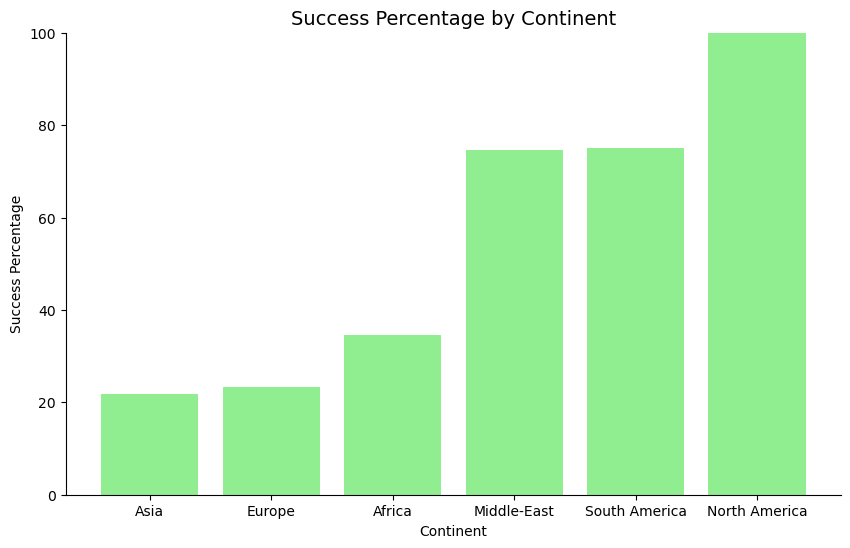

In [57]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))

plt.bar(grouped_by_cont['Continent'], 
        grouped_by_cont['Success Percentage'], 
        color= '#90EE90')

plt.xlabel('Continent')
plt.ylabel('Success Percentage')
plt.title('Success Percentage by Continent', fontsize = 14)
plt.ylim(0, 100)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#### Section 2.9: Data Preparation for Modelling

Now that we have concluded which variables to use we can now perform a final manipulation of our dataset to be used as our modelling inputs

In [58]:
#Visualising our existing data
Filtered_df.reset_index(drop=True, inplace=True)
print(Filtered_df.head(5))
print(Filtered_df.shape)
print(Filtered_df['OBS_VALUE_Rejected'].sum())
print(Filtered_df['OBS_VALUE_Positive'].sum())

  citizen sex     age  TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive
0      AF   F  Y18-34         2008                   5                   0
1      AF   F  Y18-34         2009                   5                   0
2      AF   F  Y18-34         2016                   5                   0
3      AF   F  Y18-34         2018                   0                   5
4      AF   F  Y18-34         2020                   0                   5
(1739, 6)
14470
9245


In [59]:
#Merge the country dataset with the existing dataset
merged_df = pd.merge(Filtered_df, ref_df, how='left', left_on='citizen', right_on='Country Code')

#Display the updated DataFrame
print(merged_df.head(5))
print(merged_df.shape)
print(merged_df['OBS_VALUE_Rejected'].sum())
print(merged_df['OBS_VALUE_Positive'].sum())

  citizen sex     age  TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive  \
0      AF   F  Y18-34         2008                   5                   0   
1      AF   F  Y18-34         2009                   5                   0   
2      AF   F  Y18-34         2016                   5                   0   
3      AF   F  Y18-34         2018                   0                   5   
4      AF   F  Y18-34         2020                   0                   5   

  Country Code      Country    Continent  GDP per Capita    GPI  
0           AF  Afghanistan  Middle-East             373  3.448  
1           AF  Afghanistan  Middle-East             373  3.448  
2           AF  Afghanistan  Middle-East             373  3.448  
3           AF  Afghanistan  Middle-East             373  3.448  
4           AF  Afghanistan  Middle-East             373  3.448  
(1739, 11)
14470
9245


In [65]:
df = merged_df.copy()

#Adding a success percentage column
df['Success Percentage'] = (df['OBS_VALUE_Positive'] / 
(df['OBS_VALUE_Rejected'] + df['OBS_VALUE_Positive'])) * 100

#Display the grouped DataFrame
print(df.head(5))
print(df.shape)
print(df['OBS_VALUE_Rejected'].sum())
print(df['OBS_VALUE_Positive'].sum())

  citizen sex     age  TIME_PERIOD  OBS_VALUE_Rejected  OBS_VALUE_Positive  \
0      AF   F  Y18-34         2008                   5                   0   
1      AF   F  Y18-34         2009                   5                   0   
2      AF   F  Y18-34         2016                   5                   0   
3      AF   F  Y18-34         2018                   0                   5   
4      AF   F  Y18-34         2020                   0                   5   

  Country Code      Country    Continent  GDP per Capita    GPI  \
0           AF  Afghanistan  Middle-East             373  3.448   
1           AF  Afghanistan  Middle-East             373  3.448   
2           AF  Afghanistan  Middle-East             373  3.448   
3           AF  Afghanistan  Middle-East             373  3.448   
4           AF  Afghanistan  Middle-East             373  3.448   

   Success Percentage  
0                 0.0  
1                 0.0  
2                 0.0  
3               100.0  
4       

In [66]:
#Looking at some key Summary statistics
statistics = df[['OBS_VALUE_Rejected', 'OBS_VALUE_Positive', 'Success Percentage']].describe()
print(statistics)

       OBS_VALUE_Rejected  OBS_VALUE_Positive  Success Percentage
count         1739.000000         1739.000000         1739.000000
mean             8.320874            5.316274           41.565813
std             18.118440           12.388189           46.581682
min              0.000000            0.000000            0.000000
25%              0.000000            0.000000            0.000000
50%              5.000000            0.000000            0.000000
75%             10.000000            5.000000          100.000000
max            330.000000          190.000000          100.000000


I wanted to make the data easier to work with so I decided to expand the Dataframe so that every row of our new dataset represents one individual applicant. 

In [67]:
#Function to expand the DataFrame
def expand_data(row):
    new_rows = []
    
    for _ in range(row['OBS_VALUE_Rejected']):
        new_row = row[['Country', 'Continent', 'sex', 'age', 'TIME_PERIOD', 'GDP per Capita', 'GPI']]
        new_row['Successful'] = False
        new_rows.append(new_row) #Appends rows to 'new_rows' list
    
    #Above code creates a new row for each false value and sets Successful column to FALSE
    
    for _ in range(row['OBS_VALUE_Positive']):
        new_row = row[['Country', 'Continent', 'sex', 'age', 'TIME_PERIOD', 'GDP per Capita', 'GPI']]
        new_row['Successful'] = True
        new_rows.append(new_row)
        
    #Repeats for Positive values 

    return pd.DataFrame(new_rows, columns = df.columns.tolist() + ['Successful'])
    #Returns the 'new_rows' to using the same columns as the old df

#Apply the function to each row and concatenate the results
expanded_df = pd.concat(df.apply(expand_data, axis=1).tolist(), ignore_index=True)

#Tidy by removing some columns 
expanded_df = expanded_df.drop(columns = ['OBS_VALUE_Rejected','OBS_VALUE_Positive', 
                                        'citizen', 'Country Code', 'Success Percentage'])

#Display the expanded DataFrame
print(expanded_df.head(5))

  sex     age  TIME_PERIOD      Country    Continent  GDP per Capita    GPI  \
0   F  Y18-34         2008  Afghanistan  Middle-East             373  3.448   
1   F  Y18-34         2008  Afghanistan  Middle-East             373  3.448   
2   F  Y18-34         2008  Afghanistan  Middle-East             373  3.448   
3   F  Y18-34         2008  Afghanistan  Middle-East             373  3.448   
4   F  Y18-34         2008  Afghanistan  Middle-East             373  3.448   

   Successful  
0       False  
1       False  
2       False  
3       False  
4       False  


Peform some quick checks 

In [69]:
#Old Dataframe
print("Number of successful individuals:", Final_df['OBS_VALUE_Positive'].sum())
print("Number of unsuccessful individuals:", Final_df['OBS_VALUE_Rejected'].sum())

Number of successful individuals: 9245
Number of unsuccessful individuals: 14470


In [70]:
#New Dataframe
print("Number of successful individuals:", expanded_df['Successful'].sum())
print("Number of unsuccessful individuals:", (~expanded_df['Successful']).sum())

Number of successful individuals: 9245
Number of unsuccessful individuals: 14470


#### Section 2.10: Binomial Distribution

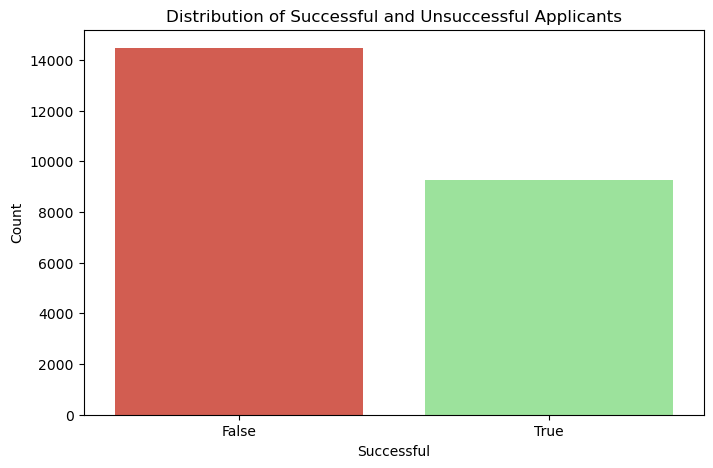

Success count: 9245
Total count: 23715
Success rate: 0.3898376554923044


In [73]:
#Plotting histogram
plt.figure(figsize=(8, 5))
sns.countplot(x='Successful', data=expanded_df, palette=['#e74c3c', '#90EE90'])
plt.title('Distribution of Successful and Unsuccessful Applicants')
plt.xlabel('Successful')
plt.ylabel('Count')
plt.show()

#Display summary statistics
success_count = expanded_df['Successful'].sum()
total_count = len(expanded_df)

print(f"Success count: {success_count}")
print(f"Total count: {total_count}")
print(f"Success rate: {success_count / total_count}")

I then applied the binomial distribution to a small sample of 100 applicants to visualise their probability of success.

In [74]:
#Setting the variables for our binomial distribution 
n = 100
p = expanded_df['Successful'].mean()

print(f"Number of trials (n): {n}")
print(f"Probability of success (p): {p}")

Number of trials (n): 100
Probability of success (p): 0.3898376554923044


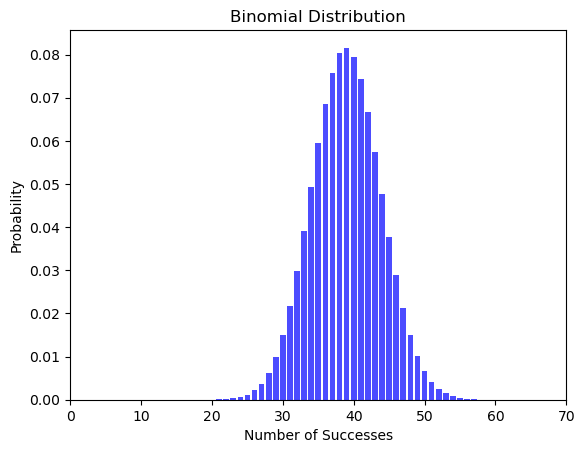

In [75]:
#Generate the distribution
binom_dist = binom(100, p)

#Generate x values (number of successes)
x_values = np.arange(0, n+1)

#Calculate the probability mass function (PMF) for each x value
pmf_values = binom_dist.pmf(x_values)

#Visualize the binomial distribution
plt.bar(x_values, pmf_values, color='blue', alpha=0.7)
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xlim(0, 70)
plt.xticks(np.arange(0, 71, step=10))
plt.show()

##### Why is Binomial Distribution Appropriate:

The binomial distribution is appropriate because it suits the characteristics of the data and the nature of the scenario.

The binomial distribution is designed for situations where there are only two possible outcomes for each trial. In this case, the outcome of each application is either "Successful" or "Unsuccessful" making it a binary event.

##### Why Normal Distribution is not Apprropriate:

Since we are dealing with counts of discrete events (successes and rejections), a normal distribution might not be suitable. Normal distributions are more applicable to continuous data, and using them for counts could lead to inaccuracies.

#### Section 2.11 Desision Tree Model

In [76]:
#Create a label encoder simply to tidy the df
label_encoder = LabelEncoder()

#Apply label encoding to categorical columns
expanded_df['Continent'] = label_encoder.fit_transform(expanded_df['Continent'])
expanded_df['Country'] = label_encoder.fit_transform(expanded_df['Country'])
expanded_df['sex'] = label_encoder.fit_transform(expanded_df['sex'])
expanded_df['age'] = label_encoder.fit_transform(expanded_df['age'])
expanded_df['TIME_PERIOD'] = label_encoder.fit_transform(expanded_df['TIME_PERIOD'])
expanded_df['Successful'] = label_encoder.fit_transform(expanded_df['Successful'])

#Check the data
print(expanded_df.head(5))
print("Contients:",expanded_df['Continent'].unique())
print("Sex:",expanded_df['sex'].unique())
print("Age:",expanded_df['age'].unique())
print("Years:",expanded_df['TIME_PERIOD'].unique())
print("Success:",expanded_df['Successful'].unique())

   sex  age  TIME_PERIOD  Country  Continent  GDP per Capita    GPI  \
0    0    1            0        0          3             373  3.448   
1    0    1            0        0          3             373  3.448   
2    0    1            0        0          3             373  3.448   
3    0    1            0        0          3             373  3.448   
4    0    1            0        0          3             373  3.448   

   Successful  
0           0  
1           0  
2           0  
3           0  
4           0  
Contients: [3 2 0 1 5 4]
Sex: [0 1]
Age: [1 4 0 2 3]
Years: [ 0  1  8 10 12 14  4  2  3  9 11 13  5  6  7]
Success: [0 1]


In [85]:
Tree_df = expanded_df

#Define X and Y
X = Tree_df.drop('Successful', axis=1)

#X = Tree_df.drop(['Successful','TIME_PERIOD'], axis=1)

y = Tree_df['Successful']

In [86]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23715, 7), (23715,), (18972, 7), (4743, 7), (18972,), (4743,))

In [87]:
#Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state= 45)

#Train the model
model.fit(X_train, y_train)

#Make predictions on the testing set
predictions = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.8587391946025722

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2867
           1       0.80      0.85      0.83      1876

    accuracy                           0.86      4743
   macro avg       0.85      0.86      0.85      4743
weighted avg       0.86      0.86      0.86      4743



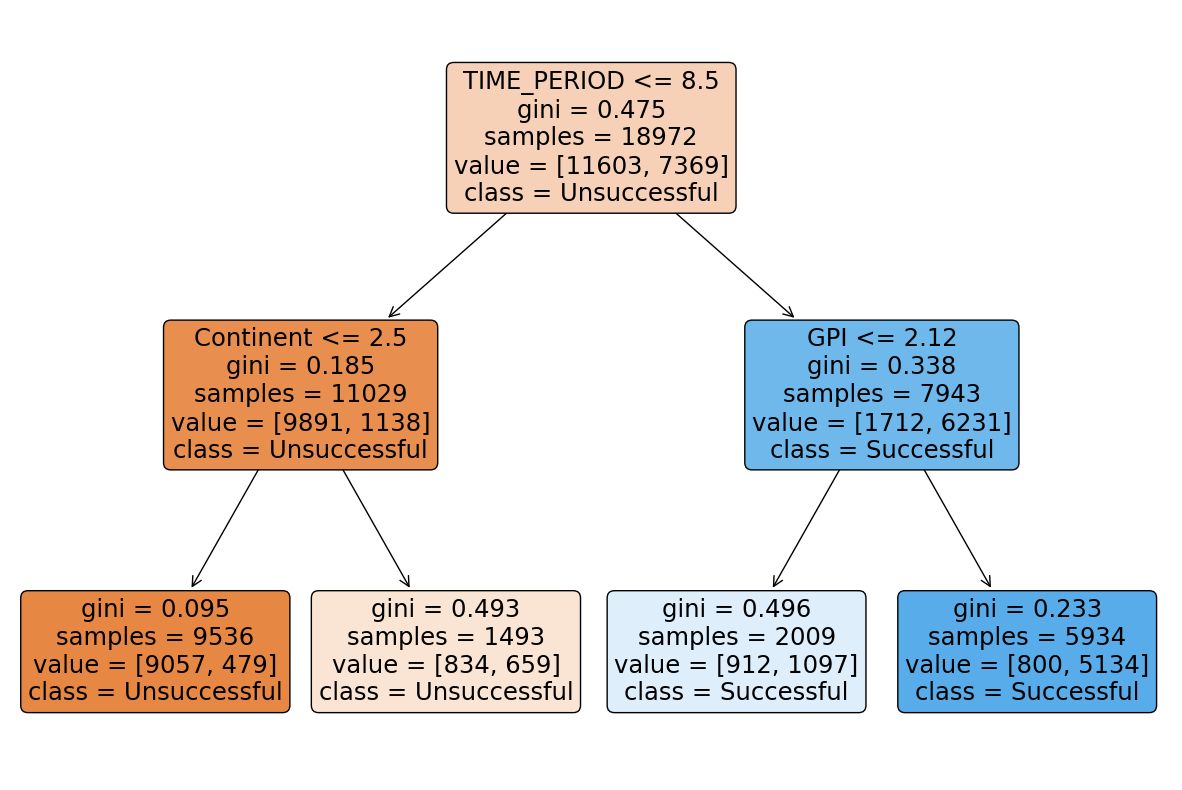

In [88]:
#Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Unsuccessful', 'Successful'], filled=True, rounded=True)
plt.show()

<Axes: >

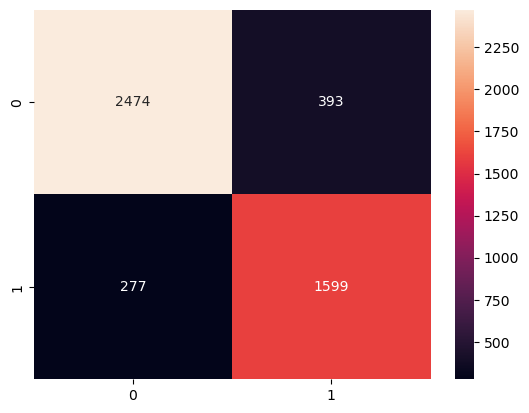

In [89]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions)

#Plot confusion matrix
sns.heatmap(cm, annot = True, fmt='d')

In [90]:
#Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 6, 10]}

#Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=45)

#Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

#Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

#Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Make predictions on the testing set using the best model
predictions = best_model.predict(X_test)

#Evaluate the best model
accuracy_dt = accuracy_score(y_test, predictions)
report_dt = classification_report(y_test, predictions)

print(f'Best Parameters: {best_params}\n')
print(f'Accuracy with GridSearchCV: {accuracy_dt}\n')
print(f'Classification Report:\n{report_dt}')

Best Parameters: {'criterion': 'gini', 'max_depth': 10}

Accuracy with GridSearchCV: 0.9190385831752056

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2867
           1       0.90      0.89      0.90      1876

    accuracy                           0.92      4743
   macro avg       0.92      0.91      0.92      4743
weighted avg       0.92      0.92      0.92      4743



<Axes: >

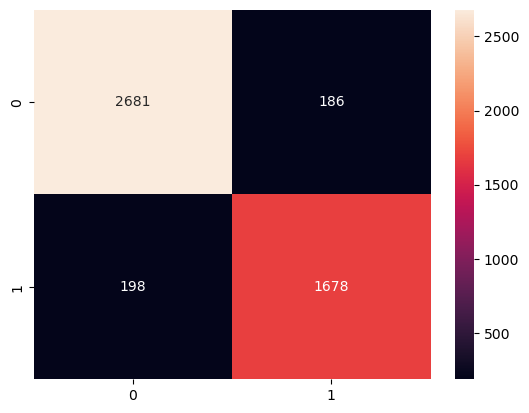

In [91]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions)

#Plot Confusion Matrix
sns.heatmap(cm, annot = True, fmt='d')

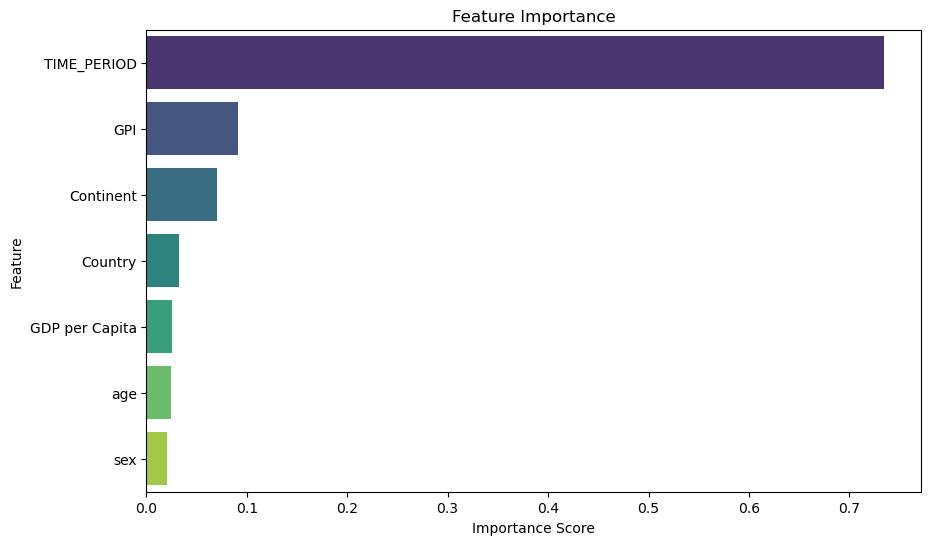

In [92]:
#Feature Importance
feature_importance = best_model.feature_importances_
feature_names = X.columns  

#Create a DataFrame to store feature names and their importance scores
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

#Sort the DataFrame by importance in descending order
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

#Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Section 2.12: Random Forest Model

In [93]:
Forrest_df = expanded_df

#Define X 
X = Forrest_df.drop('Successful', axis=1)

#X = Forrest_df.drop(['Successful','TIME_PERIOD'], axis=1)

#Define Y
y = Forrest_df['Successful']

In [94]:
#Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

#Display the Data Shapes
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23715, 7), (23715,), (18972, 7), (4743, 7), (18972,), (4743,))

In [95]:
#Create a Random Forrest Model 
model = RandomForestClassifier(n_estimators = 100, criterion='gini', max_depth = 100)

#Train the model
model.fit(X_train,y_train)

#Make predictions on the testing set
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.9209361163820367

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2912
           1       0.91      0.88      0.90      1831

    accuracy                           0.92      4743
   macro avg       0.92      0.91      0.92      4743
weighted avg       0.92      0.92      0.92      4743



In [96]:
#Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 50, 100, None]}

#Create the Random Forest model
rf_model = RandomForestClassifier()

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=4)

#Fit the grid search to the data
grid_search.fit(X_train, y_train)

#Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Print the best parameters
print("Best Hyperparameters:")
print(best_params)

#Make predictions on the testing set using the best model
y_pred_best = best_model.predict(X_test)

#Evaluate the best model
accuracy_rf = accuracy_score(y_test, y_pred_best)
report_rf = classification_report(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_rf}\n')
print(f'Best Model Classification Report:\n{report_rf}')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters:
{'max_depth': 10, 'n_estimators': 50}
Best Model Accuracy: 0.9255745308876239

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2912
           1       0.91      0.89      0.90      1831

    accuracy                           0.93      4743
   macro avg       0.92      0.92      0.92      4743
weighted avg       0.93      0.93      0.93      4743



<Axes: >

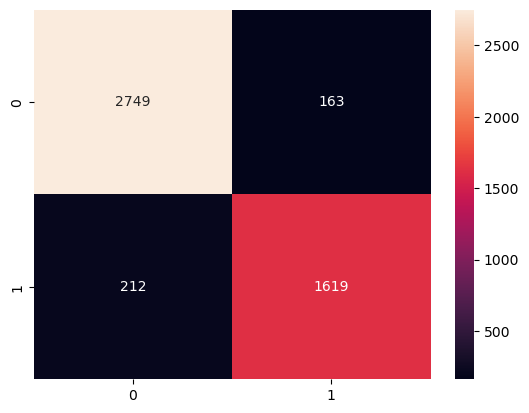

In [97]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Plot Confusion Matrix
sns.heatmap(cm, annot = True, fmt='d')

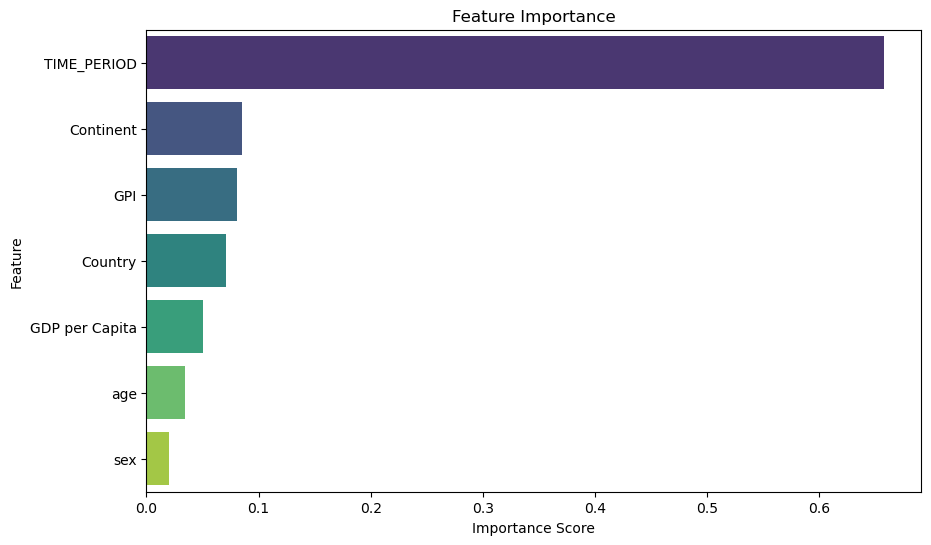

In [98]:
#Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns  

#Create a DataFrame to store feature names and their importance scores
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

#Sort the DataFrame by importance in descending order
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

#Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Section 2.13: Non-Linear SVM Model

In [99]:
SVM_df = expanded_df

#Define X 
X = SVM_df.drop('Successful', axis=1)

#X = SVM_df.drop(['Successful','TIME_PERIOD'], axis=1)

#Define Y
y = SVM_df['Successful']

In [100]:
#Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

#Display the Data Shapes
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23715, 7), (23715,), (18972, 7), (4743, 7), (18972,), (4743,))

In [101]:
#Standardise the input data for SVM model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test

(array([[ 0.74452505,  1.76083028,  1.34394597, ...,  0.70905136,
          0.93162216, -1.30906931],
        [ 0.74452505, -0.70471332,  1.1529575 , ..., -0.83106226,
         -0.80905703,  0.92827481],
        [-1.34313815, -0.70471332, -0.1839618 , ..., -0.83106226,
         -0.75365964, -1.25980669],
        ...,
        [ 0.74452505, -0.70471332,  0.96196902, ...,  1.47910818,
          0.97433822,  0.0436002 ],
        [-1.34313815,  1.76083028, -1.32989263, ...,  0.70905136,
          0.53282775, -1.45890979],
        [-1.34313815, -0.70471332, -1.32989263, ..., -0.83106226,
         -0.28445049,  0.26528201]]),
 array([[ 0.74452505,  1.76083028, -0.75692722, ..., -0.83106226,
         -0.28445049,  0.26528201],
        [ 0.74452505, -0.70471332, -1.13890416, ..., -0.06100545,
         -0.1993521 , -0.5537091 ],
        [-1.34313815,  1.76083028, -0.56593875, ..., -0.83106226,
         -0.28445049,  0.26528201],
        ...,
        [ 0.74452505, -0.70471332,  0.77098055, ...,  

In [102]:
#Create a non-linear SVM Model
svm_model = SVC(C = 100, kernel='rbf')

#Train the model
svm_model.fit(X_train, y_train)

#Make the predictions
y_pred = svm_model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}')

Accuracy: 0.9125026354627873

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2912
           1       0.90      0.87      0.89      1831

    accuracy                           0.91      4743
   macro avg       0.91      0.91      0.91      4743
weighted avg       0.91      0.91      0.91      4743



In [103]:
#Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Define the parameter grid for GridSearchCV
param_grid = [ {'gamma': [0.01, 0.001],
                     'C': [1, 10, 100]}]

#Set up GridSearchCV()
grid_search = GridSearchCV(estimator = svm_model, 
                        param_grid = param_grid, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 4,
                        return_train_score = True)  


#Train the model with the best hyperparameters
grid_search.fit(X_train, y_train)

#Get the best parameters
best_params = grid_search.best_params_

#Make predictions on the testing set
y_pred_svm = grid_search.predict(X_test)

#Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'Best Hyperparameters: {best_params}\n')
print(f'Accuracy: {accuracy_svm}\n')
print(f'Classification Report:\n{report_svm}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=1, gamma=0.01;, score=(train=0.880, test=0.877) total time=  21.8s
[CV 2/5] END C=1, gamma=0.01;, score=(train=0.877, test=0.888) total time=  22.0s
[CV 3/5] END C=1, gamma=0.01;, score=(train=0.879, test=0.877) total time=  21.7s
[CV 4/5] END C=1, gamma=0.01;, score=(train=0.880, test=0.875) total time=  21.9s
[CV 5/5] END C=1, gamma=0.01;, score=(train=0.879, test=0.877) total time=  21.5s
[CV 1/5] END C=1, gamma=0.001;, score=(train=0.869, test=0.861) total time=  27.7s
[CV 2/5] END C=1, gamma=0.001;, score=(train=0.869, test=0.872) total time=  26.1s
[CV 3/5] END C=1, gamma=0.001;, score=(train=0.868, test=0.871) total time=  29.5s
[CV 4/5] END C=1, gamma=0.001;, score=(train=0.870, test=0.872) total time=  26.7s
[CV 5/5] END C=1, gamma=0.001;, score=(train=0.871, test=0.870) total time=  25.4s
[CV 1/5] END C=10, gamma=0.01;, score=(train=0.887, test=0.887) total time=  21.2s
[CV 2/5] END C=10, gamma=0.01;, 

<Axes: >

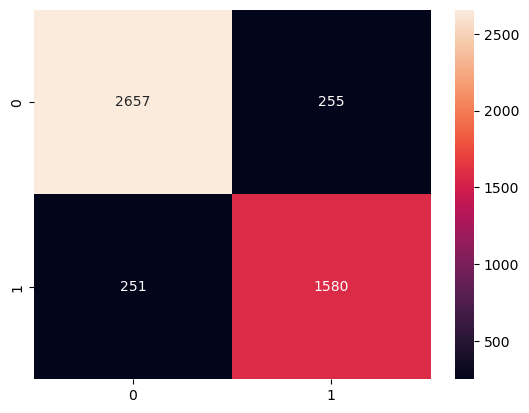

In [108]:
#Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

#Plot confusion matrix
sns.heatmap(cm, annot = True, fmt='d')

In [109]:
#GridSearch results output
cv_results = pd.DataFrame(grid_search.cv_results_)

#cv_results

#### Section 2.14: Comparison of Models 

In [110]:
print(accuracy_svm)
print(accuracy_rf)
print(accuracy_dt)

0.8933164663714949
0.9255745308876239
0.9190385831752056


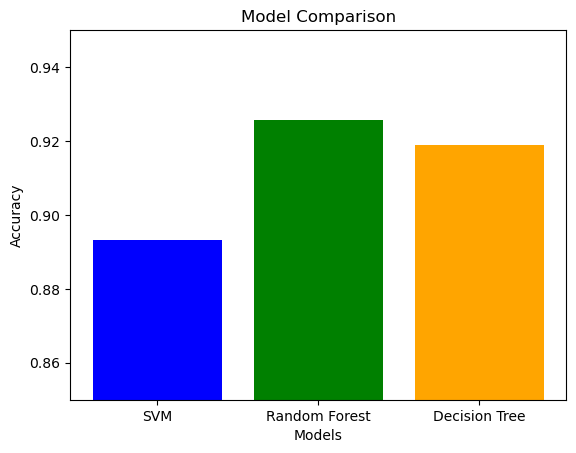

In [111]:
#Organising Data
models = ['SVM', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_svm, accuracy_rf, accuracy_dt]

#Plotting
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.85, 0.95)  
#plt.ylim(0.7, 0.8)  
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

End